## Importar librerias

In [18]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv('clientes_banco_traducido.csv')

In [20]:
df.head()

,Customer_ID,Age,Education_Level,Marital_Status,Family_Size,Income_Category,Occupation,Years_Employed,Annual_Income,Has_Car,Housing
0,5008804,32,Higher education,Union-stable,2,Employee,Other,12,427500.0,1,Rented apartment
1,5008805,32,Higher education,Union-stable,2,Employee,Other,12,427500.0,1,Rented apartment
2,5008806,58,High school,Married,2,Employee,Security,3,112500.0,1,Own house/apartment
3,5008808,52,High school,Single,1,Business associate,Sales,8,270000.0,0,Own house/apartment
4,5008809,52,High school,Single,1,Business associate,Sales,8,270000.0,0,Own house/apartment


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438463 entries, 0 to 438462
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Customer_ID      438463 non-null  int64  
 1   Age              438463 non-null  int64  
 2   Education_Level  438463 non-null  object 
 3   Marital_Status   438463 non-null  object 
 4   Family_Size      438463 non-null  int64  
 5   Income_Category  438463 non-null  object 
 6   Occupation       438463 non-null  object 
 7   Years_Employed   438463 non-null  int64  
 8   Annual_Income    438463 non-null  float64
 9   Has_Car          438463 non-null  int64  
 10  Housing          438463 non-null  object 
dtypes: float64(1), int64(5), object(5)
memory usage: 36.8+ MB


In [22]:
df.describe(include='all')

,Customer_ID,Age,Education_Level,Marital_Status,Family_Size,Income_Category,Occupation,Years_Employed,Annual_Income,Has_Car,Housing
count,4.384630e+05,438463.000000,438463,438463,438463.000000,438463,438463,438463.000000,4.384630e+05,438463.000000,438463
unique,NaN,NaN,5,5,NaN,5,19,NaN,NaN,NaN,6
top,NaN,NaN,High school,Married,NaN,Employee,Other,NaN,NaN,NaN,Own house/apartment
freq,NaN,NaN,301756,299768,NaN,226059,134177,NaN,NaN,NaN,393748
mean,6.021894e+06,43.295865,NaN,NaN,2.194461,NaN,NaN,5.531215,1.875220e+05,0.371906,NaN
std,5.713554e+05,11.459616,NaN,NaN,0.897194,NaN,NaN,6.492446,1.100832e+05,0.483314,NaN
min,5.008804e+06,20.000000,NaN,NaN,1.000000,NaN,NaN,0.000000,2.610000e+04,0.000000,NaN
25%,5.609340e+06,34.000000,NaN,NaN,2.000000,NaN,NaN,1.000000,1.215000e+05,0.000000,NaN
50%,6.047690e+06,42.000000,NaN,NaN,2.000000,NaN,NaN,4.000000,1.611000e+05,0.000000,NaN
75%,6.454118e+06,53.000000,NaN,NaN,3.000000,NaN,NaN,8.000000,2.250000e+05,1.000000,NaN


## Análisis de variables relevantes:

- Age: Edad puede influir en estabilidad y riesgo. Valores extremos deben evaluarse.
- Education_Level: Puede estar relacionado con nivel de ingresos y riesgo crediticio.
- Family_Size: Tamaños muy grandes podrían afectar capacidad de pago.
- Income_Category y Annual_Income: Variables clave. Ingresos altos → más probabilidad de aprobación.
- Years_Employed: Más experiencia laboral se relaciona con mayor estabilidad.
- Has_Car: Un proxy de capacidad económica.
- Housing: Tener vivienda propia reduce riesgo.

In [23]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Crear una copia del dataframe
df_num = df.copy()

# Convertir variables categóricas a numéricas
categorical_cols = ['Education_Level', 'Marital_Status', 'Income_Category', 'Occupation', 'Housing']
le = LabelEncoder()
for col in categorical_cols:
    df_num[col] = le.fit_transform(df_num[col])

# Escalar Annual_Income y Years_Employed
scaler = MinMaxScaler()
df_num[['Annual_Income', 'Years_Employed']] = scaler.fit_transform(df_num[['Annual_Income', 'Years_Employed']])

In [24]:
df_num.head(10)

,Customer_ID,Age,Education_Level,Marital_Status,Family_Size,Income_Category,Occupation,Years_Employed,Annual_Income,Has_Car,Housing
0,5008804,32,2,3,2,1,12,0.255319,0.059697,1,5
1,5008805,32,2,3,2,1,12,0.255319,0.059697,1,5
2,5008806,58,1,1,2,1,17,0.063830,0.012850,1,3
3,5008808,52,1,2,1,0,15,0.170213,0.036274,0,3
4,5008809,52,1,2,1,0,15,0.170213,0.036274,0,3
5,5008810,52,1,2,1,0,15,0.170213,0.036274,0,3
6,5008811,52,1,2,1,0,15,0.170213,0.036274,0,3
7,5008812,61,2,0,1,2,12,0.000000,0.038281,0,3
8,5008813,61,2,0,1,2,12,0.000000,0.038281,0,3
9,5008814,61,2,0,1,2,12,0.000000,0.038281,0,3


In [25]:
df.shape

(438463, 11)

In [26]:
df_num.shape

(438463, 11)

In [27]:
# Variables auxiliares desde df original
age = df['Age'].values
education = df_num['Education_Level'].values
housing = df_num['Housing'].values
has_car = df_num['Has_Car'].values
income = df_num['Annual_Income'].values
employment = df_num['Years_Employed'].values

In [32]:
scores = np.zeros(len(df_num))

# Ingreso escalado (más permisivo)
scores += np.where(income > 0.4, 3, np.where(income > 0.2, 2, np.where(income > 0.1, 1, 0)))

# Empleo escalado
scores += np.where(employment > 0.4, 2, np.where(employment > 0.1, 1, 0))

# Edad original
scores += np.where((age >= 28) & (age <= 55), 1, 0)

# Educación codificada
scores += np.where(education >= education.max() - 2, 1, 0)

# Vivienda codificada
scores += np.where(housing >= housing.max() - 2, 1, 0)

# Tiene carro
scores += has_car

# Ajustar umbral para aprobación
df_num['Approved'] = (scores >= 3).astype(int)

# Estadísticas actualizadas
approval_stats = df_num['Approved'].value_counts()
approval_rate = df_num['Approved'].mean() * 100

A continuación se explica el peso y la lógica de cada componente que suma al score de aprobación:

- **Ingreso escalado (más permisivo):**
    ```python
    scores += np.where(income > 0.4, 3, np.where(income > 0.2, 2, np.where(income > 0.1, 1, 0)))
    ```
    - Si el ingreso escalado es mayor a 0.4, suma **3 puntos**.
    - Si está entre 0.2 y 0.4, suma **2 puntos**.
    - Si está entre 0.1 y 0.2, suma **1 punto**.
    - Si es menor o igual a 0.1, suma **0 puntos**.
    - **Peso máximo:** 3 puntos.  
    - **Justificación:** El ingreso es el factor más relevante, por eso tiene el mayor peso.

- **Empleo escalado:**
    ```python
    scores += np.where(employment > 0.4, 2, np.where(employment > 0.1, 1, 0))
    ```
    - Si los años empleados escalados son mayores a 0.4, suma **2 puntos**.
    - Si están entre 0.1 y 0.4, suma **1 punto**.
    - Si es menor o igual a 0.1, suma **0 puntos**.
    - **Peso máximo:** 2 puntos.  
    - **Justificación:** Más experiencia laboral indica mayor estabilidad.

- **Edad original:**
    ```python
    scores += np.where((age >= 28) & (age <= 55), 1, 0)
    ```
    - Si la edad está entre 28 y 55 años, suma **1 punto**.
    - Fuera de ese rango, suma **0 puntos**.
    - **Peso máximo:** 1 punto.  
    - **Justificación:** Rango de edad considerado económicamente activo y menos riesgoso.

- **Educación codificada:**
    ```python
    scores += np.where(education >= education.max() - 2, 1, 0)
    ```
    - Si el nivel educativo está entre los 3 más altos, suma **1 punto**.
    - Si no, suma **0 puntos**.
    - **Peso máximo:** 1 punto.  
    - **Justificación:** Mayor educación puede asociarse a mejores ingresos y menor riesgo.

- **Vivienda codificada:**
    ```python
    scores += np.where(housing >= housing.max() - 2, 1, 0)
    ```
    - Si el tipo de vivienda está entre los 3 más altos (según codificación), suma **1 punto**.
    - Si no, suma **0 puntos**.
    - **Peso máximo:** 1 punto.  
    - **Justificación:** Ciertas viviendas (ej. propia) pueden indicar mayor estabilidad.

- **Tiene carro:**
    ```python
    scores += has_car
    ```
    - Si tiene carro, suma **1 punto**.
    - Si no, suma **0 puntos**.
    - **Peso máximo:** 1 punto.  
    - **Justificación:** Poseer carro es un proxy de capacidad económica.

**Total máximo posible:** 3 (ingreso) + 2 (empleo) + 1 (edad) + 1 (educación) + 1 (vivienda) + 1 (carro) = **9 puntos**.

**Umbral de aprobación:**  

In [29]:
print(f"Estadísticas de aprobación de préstamos:")
print(f"Aprobados:   {approval_stats[1]:,}")
print(f"Rechazados:  {approval_stats[0]:,}")
print(f"Tasa de aprobación: {approval_rate:.2f}%")

Estadísticas de aprobación de préstamos:
Aprobados:   269,118
Rechazados:  169,345
Tasa de aprobación: 61.38%


In [34]:
df['Approved'] = df_num['Approved']

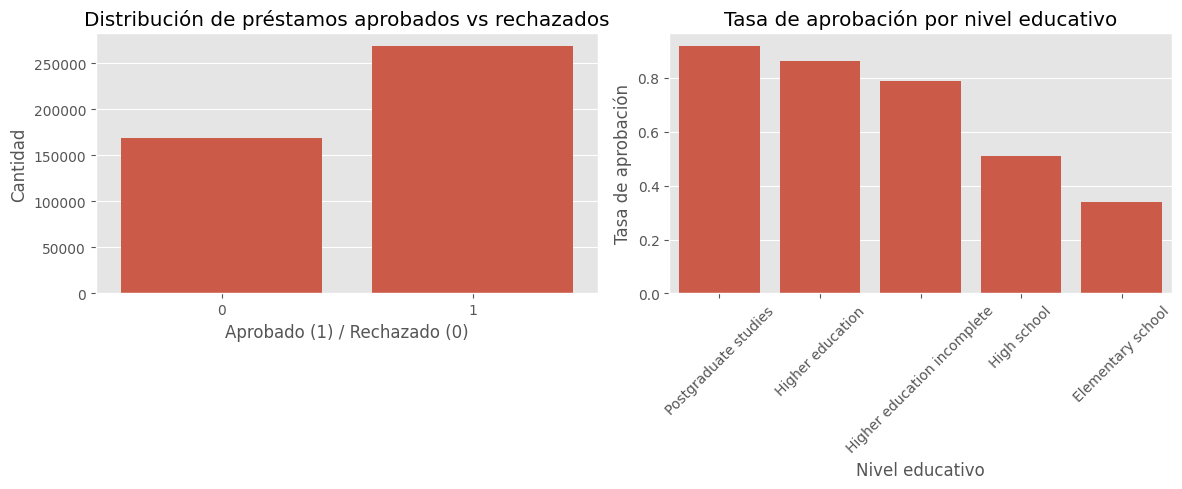

In [35]:
# Visualizar la distribución de aprobaciones
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
plt.style.use('ggplot')
plt.figure(figsize=(12, 5))

# Gráfico 1: Distribución general de aprobaciones
plt.subplot(1, 2, 1)
sns.countplot(x='Approved', data=df)
plt.title('Distribución de préstamos aprobados vs rechazados')
plt.xlabel('Aprobado (1) / Rechazado (0)')
plt.ylabel('Cantidad')

# Gráfico 2: Tasa de aprobación por nivel educativo
plt.subplot(1, 2, 2)
approval_by_edu = df.groupby('Education_Level')['Approved'].mean().sort_values(ascending=False)
sns.barplot(x=approval_by_edu.index, y=approval_by_edu.values)
plt.title('Tasa de aprobación por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Tasa de aprobación')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Guarda dataframes

In [36]:
df.to_csv('clientes_banco_aprobacion.csv', index=False)
df_num.to_csv('clientes_banco_aprobacion_numerico.csv', index=False)